In [2]:
import numpy as np
import matplotlib.pylab as plt
import os
from scipy.optimize import curve_fit

In [12]:
frecuencias = [30, 20, 10, 5, 3, 2, 1, 0.5]
numF = np.arange(1,9)
datos_f1 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_30')
datos_f2 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_20')
datos_f3 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_10')
datos_f4 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_5')
datos_f5 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_3')
datos_f6 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_2')
datos_f7 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_1')
datos_f8 = np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_0.5')



In [32]:
len(datos_frec[:,1])

10000

In [26]:
datos_frec = [datos_f1, datos_f2, datos_f3, datos_f4, datos_f5, datos_f6, datos_f7, datos_f8]

datos_frec

[array([[1.53830228e+08, 9.99000000e+02, 5.49000000e+02],
        [1.53830228e+08, 1.00100000e+03, 4.95000000e+02],
        [1.53830228e+08, 1.00200000e+03, 4.34000000e+02],
        ...,
        [1.53848438e+08, 1.90360000e+04, 3.97000000e+02],
        [1.53848438e+08, 1.90370000e+04, 3.53000000e+02],
        [1.53848438e+08, 1.90390000e+04, 3.40000000e+01]]),
 array([[1.54203140e+08, 9.99000000e+02, 3.79000000e+02],
        [1.54203140e+08, 1.00100000e+03, 3.88000000e+02],
        [1.54203140e+08, 1.00200000e+03, 4.00000000e+02],
        ...,
        [1.54221327e+08, 1.90330000e+04, 3.86000000e+02],
        [1.54221327e+08, 1.90350000e+04, 4.08000000e+02],
        [1.54221327e+08, 1.90360000e+04, 4.20000000e+01]]),
 array([[1.54431754e+08, 9.99000000e+02, 5.50000000e+02],
        [1.54431754e+08, 1.00100000e+03, 5.46000000e+02],
        [1.54431754e+08, 1.00200000e+03, 5.42000000e+02],
        ...,
        [1.54449948e+08, 1.90360000e+04, 5.27000000e+02],
        [1.54449948e+08, 1.90

In [13]:
numA = np.arange(1,6)
datos_amp = []
for i in numA:
    datos_amp.append((np.loadtxt('/home/codorso/JoseAye/2_05/sen_vibr_A{}'.format(i))))

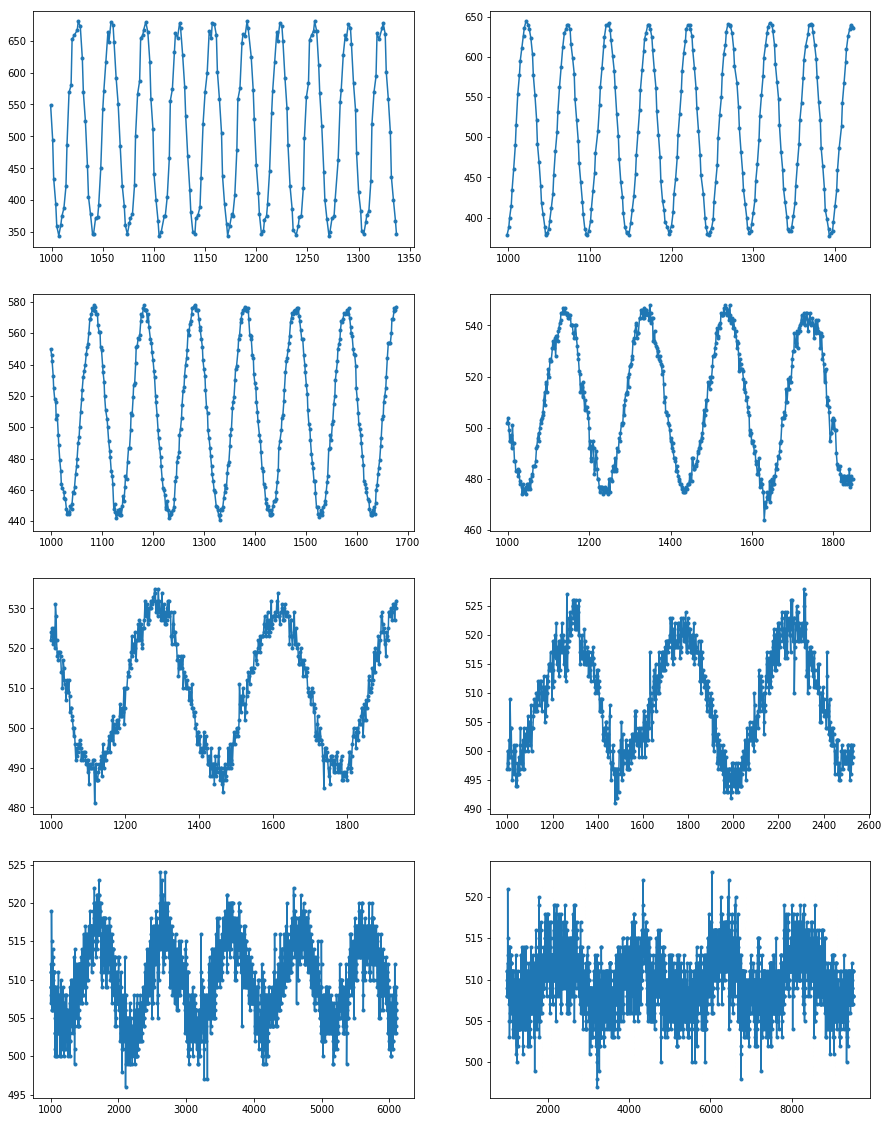

In [42]:
fin = [200, 250, 400, 500, 550, 900, 3000, 5000 ]
plt.figure(figsize=(15,20))
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.plot(datos_frec[i][:fin[i],1], datos_frec[i][:fin[i],2], '.-')
    #plt.xlim(4000,5000)
    
plt.show()

In [ ]:
f_sin = lambda x, A, B, C, D: A * np.sin(B*x+C)+D

# Ajustamos, pero con las funciónes logaritmicas. Usamos propagación de errores
def ajusteseno(datos,po):
    popt_sin, pcov_sin = curve_fit(f_sin, datos[:,0], datos[:,1], sigma = 0.005*np.ones(len(datos[:,1])), absolute_sigma=True,p0=po) #po mi parametros iniciales que a ojo yo veo que son. por default son 1.
    return(popt_sin, pcov_sin)

popt_sin, pcov_sin=ajusteseno(seno[30],po=[0.4,2*np.pi*frecuencia[30],0.04,0])
popt_sin
print pcov_sin[0]

In [ ]:
l=np.arange(0,63)
A=[]
Aperr=[]
plt.figure(figsize=(15,50))
for j in l:
    popt_sin, pcov_sin=ajusteseno(seno[j],po=[0.7,2*np.pi*frecuencia[j],0.04,0])
    A.append(popt_sin[0])
    Aperr.append(np.sqrt(pcov_sin[0,0])) #CHEQUEAR si no entendí mal, este sería el error de la amplitud
    plt.subplot(13,5,j+1)
    plt.plot(seno[j][:,0],seno[j][:,1])
    plt.plot(seno[j][:,0],popt_sin[0] * np.sin(popt_sin[1]*seno[j][:,0]+popt_sin[2])+popt_sin[3])

plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.errorbar(frecuencia,np.abs(A),Aperr, fmt= '.-', ecolor='r', )#,'.-')
plt.semilogx()
plt.grid()
plt.xlabel('Frecuencia (Hz)', fontsize='x-large')
plt.ylabel('Amplitud (V)', fontsize='x-large')
plt.title('Curva barrido con sinusoidal' , fontsize='x-large')
#plt.savefig('Calibr_A_sen.png')
plt.show()